<a href="https://colab.research.google.com/github/PrasDev4/Leetcode/blob/main/Assaignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading the dataset

In [21]:
import pandas as pd

# Load the dataset
data = pd.read_excel('/content/AI ML Internship Training Data.xlsx')

# Display the first few rows
print(data.head())

  Shipment ID     Origin Destination Shipment Date Planned Delivery Date  \
0  SHIP000000     Jaipur      Mumbai    2023-04-26            2023-05-01   
1  SHIP000001  Bangalore       Delhi    2023-02-09            2023-02-13   
2  SHIP000002     Mumbai     Chennai    2023-09-19            2023-09-25   
3  SHIP000003  Hyderabad   Ahmedabad    2023-04-01            2023-04-05   
4  SHIP000004    Chennai     Kolkata    2023-11-24            2023-11-26   

  Actual Delivery Date Vehicle Type  Distance (km) Weather Conditions  \
0           2023-05-02      Trailer           1603               Rain   
1           2023-02-17      Trailer           1237              Storm   
2           2023-09-25        Truck           1863              Clear   
3           2023-04-05    Container           1374              Clear   
4           2023-11-28    Container            676              Clear   

  Traffic Conditions Delayed  
0              Light     Yes  
1           Moderate     Yes  
2          

In [22]:
# Check for missing values
print(data.isnull().sum())

# Remove duplicates
data = data.drop_duplicates()

Shipment ID                0
Origin                     0
Destination                0
Shipment Date              0
Planned Delivery Date      0
Actual Delivery Date       0
Vehicle Type             597
Distance (km)              0
Weather Conditions         0
Traffic Conditions         0
Delayed                    0
dtype: int64


In [23]:
# Check for missing values in 'Vehicle Type'
print(data['Vehicle Type'].isnull().sum())

# Fill missing values with the mode (most common value)
data['Vehicle Type'].fillna(data['Vehicle Type'].mode()[0], inplace=True)

597


<ipython-input-23-ba063ed4b527>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Vehicle Type'].fillna(data['Vehicle Type'].mode()[0], inplace=True)


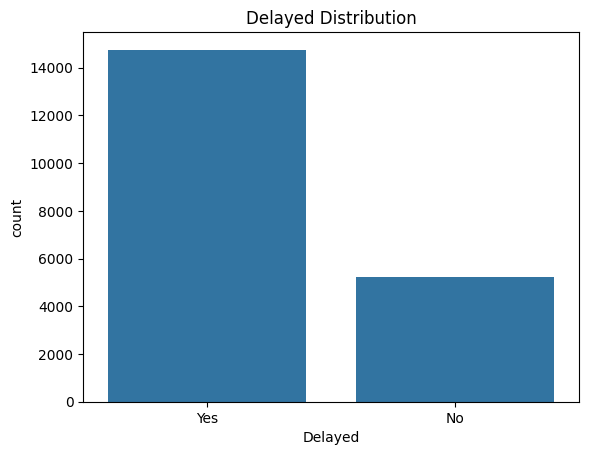

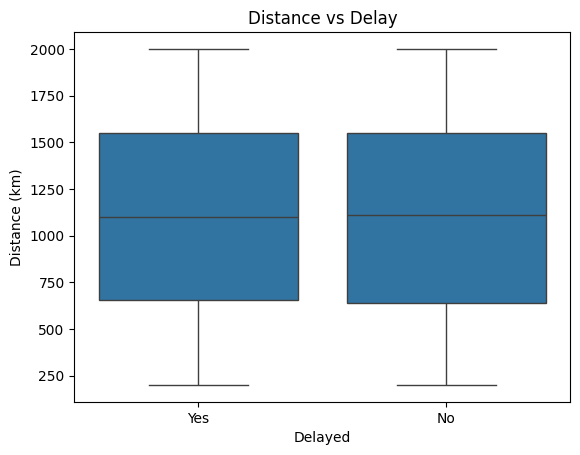

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the target variable
sns.countplot(x='Delayed', data=data)
plt.title('Delayed Distribution')
plt.show()

# Visualize the relationship between distance and delay
sns.boxplot(x='Delayed', y='Distance (km)', data=data)
plt.title('Distance vs Delay')
plt.show()

In [25]:
# Convert categorical variables using one-hot encoding
data = pd.get_dummies(data, columns=['Origin', 'Destination', 'Vehicle Type', 'Weather Conditions', 'Traffic Conditions'], drop_first=True)

# Convert Shipment Date to datetime and extract features
data['Shipment Date'] = pd.to_datetime(data['Shipment Date'])
data['Day of Week'] = data['Shipment Date'].dt.dayofweek
data['Month'] = data['Shipment Date'].dt.month

data['Delivery Time'] = (data['Actual Delivery Date'] - data['Planned Delivery Date']).dt.days

# Drop the original date columns
data.drop(['Planned Delivery Date', 'Actual Delivery Date'], axis=1, inplace=True)

# Drop the original Shipment Date column
data.drop('Shipment Date', axis=1, inplace=True)

In [26]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = data.drop(['Delayed', 'Shipment ID'], axis=1)
y = data['Delayed'].map({'Yes': 1, 'No': 0})  # Convert target variable to binary

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
lr_model = LogisticRegression(max_iter=1000)

# Train Random Forest model
rf_model.fit(X_train, y_train)

# Train Logistic Regression model
lr_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [28]:
# Make predictions
rf_predictions = rf_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)

# Evaluate Random Forest model
print("Random Forest Model:")
print("Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

# Evaluate Logistic Regression model
print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions))

Random Forest Model:
Accuracy: 0.99975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1059
           1       1.00      1.00      1.00      2941

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000

Logistic Regression Model:
Accuracy: 0.9955
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1059
           1       1.00      0.99      1.00      2941

    accuracy                           1.00      4000
   macro avg       0.99      1.00      0.99      4000
weighted avg       1.00      1.00      1.00      4000



In [30]:
# Save the trained Random Forest model
joblib.dump(rf_model, 'shipment_model.pkl')

['shipment_model.pkl']

Downloading the model and using it in the local environment

In [33]:
from google.colab import files
files.download('/content/shipment_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>